<a href="https://colab.research.google.com/github/Guhan2348519/ADVANCED-ML-tasks/blob/main/2348519_lab2_AML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
data= pd.read_csv('/content/drive/MyDrive/Program_2_Dataset - Program_2_Dataset.csv')

In [37]:
data.head(5)

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [38]:
data.isna().sum()

Crime_Rate          0
Zone_proportion     0
Non_Retail_Acres    0
CHAS                0
NOX                 0
Avg_rooms           0
AGE                 0
Distance            0
RAD                 0
Property_TaxRate    0
PTRATIO             0
B                   0
LSTAT               0
MValue              0
dtype: int64

In [39]:
print(data.describe())

       Crime_Rate  Zone_proportion  Non_Retail_Acres        CHAS         NOX  \
count  506.000000       506.000000        506.000000  506.000000  506.000000   
mean     3.613524        11.363636         11.136779    0.069170    0.554695   
std      8.601545        23.322453          6.860353    0.253994    0.115878   
min      0.006320         0.000000          0.460000    0.000000    0.385000   
25%      0.082045         0.000000          5.190000    0.000000    0.449000   
50%      0.256510         0.000000          9.690000    0.000000    0.538000   
75%      3.677083        12.500000         18.100000    0.000000    0.624000   
max     88.976200       100.000000         27.740000    1.000000    0.871000   

        Avg_rooms         AGE    Distance         RAD  Property_TaxRate  \
count  506.000000  506.000000  506.000000  506.000000        506.000000   
mean     6.284634   68.574901    3.795043    9.549407        408.237154   
std      0.702617   28.148861    2.105710    8.707259 

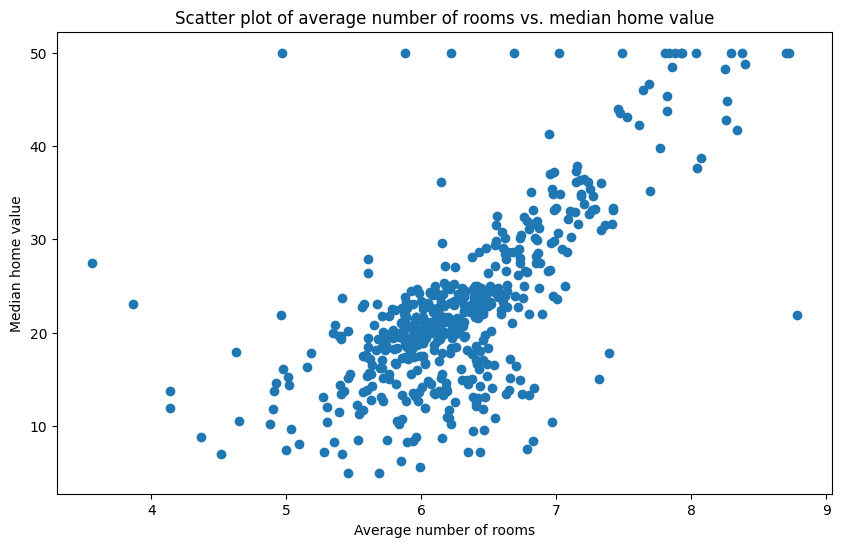

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Avg_rooms'], df['MValue'])
plt.xlabel('Average number of rooms')
plt.ylabel('Median home value')
plt.title('Scatter plot of average number of rooms vs. median home value')
plt.show()

In [65]:
pred_var = ['Avg_rooms', 'Distance', 'Property_TaxRate']
target = 'MValue'
X = data[pred_var]
y = data['MValue']

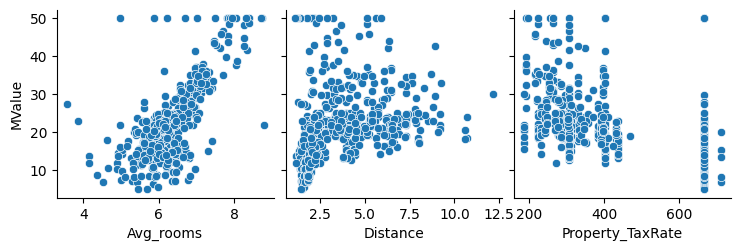

In [66]:
sns.pairplot(data, x_vars=pred_var, y_vars=target)
plt.show()

In [33]:
train_data, test_data = train_test_split(df, test_size=0.33, random_state=42)

In [43]:

def calculate_vif(data_frame, predictors):
    X = data_frame[predictors]
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

vif_results = calculate_vif(data, pred_var)
print("VIF Results:")
print(vif_results)

VIF Results:
           Variable        VIF
0         Avg_rooms  15.307161
1          Distance   5.504893
2  Property_TaxRate   6.944860

Model Evaluation (Training Set):
Mean Squared Error (MSE): 41.404316050385425
R-squared: 0.5461468623916351

Model Evaluation (Test Set):
Mean Squared Error (MSE): 28.462783755055806
R-squared: 0.595111554339972


In [45]:

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [53]:

coefficients = model.coef_
intercept = model.intercept_

print(coefficients)
print(intercept)

[ 8.10807879 -0.36315937 -0.01758553]
-19.6682576802257


In [51]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [52]:
# Evaluate the model performance using mean squared error (MSE) and R-squared
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nModel Evaluation (Training Set):")
print("Mean Squared Error (MSE):", mse_train)
print("R-squared:", r2_train)

print("\nModel Evaluation (Test Set):")
print("Mean Squared Error (MSE):", mse_test)
print("R-squared:", r2_test)


Model Evaluation (Training Set):
Mean Squared Error (MSE): 41.404316050385425
R-squared: 0.5461468623916351

Model Evaluation (Test Set):
Mean Squared Error (MSE): 28.462783755055806
R-squared: 0.595111554339972


In [59]:

adj_r2_train = 1 - (1 - r2_train) * (len(y_train) - 1) / (len(y_train) - len(pred_var) - 1)
adj_r2_test = 1 - (1 - r2_test) * (len(y_test) - 1) / (len(y_test) - len(pred_var) - 1)

print("Train Adjusted R-squared:", adj_r2_train)
print("Test Adjusted R-squared:", adj_r2_test)

Train Adjusted R-squared: 0.5420825059354408
Test Adjusted R-squared: 0.5876596197572721
